In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [4]:
df = df.drop(["Garage Capacity", "Irregular Shape", "Sold Terms", "Zip", "month_sold", "Year Built", "year_sold"], axis=1)

In [5]:
df.head()

,Sold Price,DOM,HOA Fee,Quadrant,School District,Total Bedrooms,Total Bathrooms,Total Square Feet,built_after_2000
0,176000,5,0,NW,Cache,3,1,1031,0
1,225000,6,0,NW,Cache,4,2,2091,0
2,274900,14,0,NW,Cache,3,1,2016,0
3,175000,16,0,NW,Cache,4,1,1920,0
4,179000,29,0,NW,Cache,4,2,1329,0


In [6]:
#df.isna().sum()
#No missing observations
df.replace('', np.nan, inplace=True)
df.isna().sum()

Sold Price           0
DOM                  0
HOA Fee              0
Quadrant             0
School District      0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
built_after_2000     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   HOA Fee            4110 non-null   int64 
 3   Quadrant           4110 non-null   object
 4   School District    4110 non-null   object
 5   Total Bedrooms     4110 non-null   int64 
 6   Total Bathrooms    4110 non-null   int64 
 7   Total Square Feet  4110 non-null   int64 
 8   built_after_2000   4110 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 289.1+ KB


In [9]:
df.nunique()

Sold Price           1217
DOM                   248
HOA Fee                96
Quadrant                4
School District         2
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
built_after_2000        2
dtype: int64

In [10]:
#converting all categorical variables to the 'category' data type
categorical = ["Quadrant","School District", "built_after_2000"]
df[categorical] = df[categorical].apply(lambda x: x.astype("category"))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   HOA Fee            4110 non-null   int64   
 3   Quadrant           4110 non-null   category
 4   School District    4110 non-null   category
 5   Total Bedrooms     4110 non-null   int64   
 6   Total Bathrooms    4110 non-null   int64   
 7   Total Square Feet  4110 non-null   int64   
 8   built_after_2000   4110 non-null   category
dtypes: category(3), int64(6)
memory usage: 205.3 KB


In [12]:
df["DOM"].describe()

count    4110.000000
mean       40.550608
std        51.571991
min         1.000000
25%         6.000000
50%        23.000000
75%        56.000000
max       712.000000
Name: DOM, dtype: float64

The range is 711.

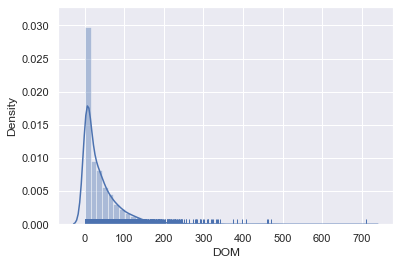

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(df['DOM'], kde=True, bins=50, rug=True)
plt.show()

The data for this variable looks like it is skewed to the right and it is not normally distributed. 

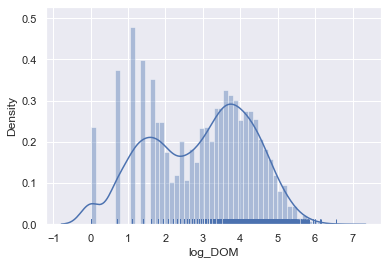

In [16]:
df['log_DOM'] = np.log(df['DOM'])
plt.figure(figsize=(6,4))
sns.distplot(df['log_DOM'], kde=True, bins=50, rug=True)
plt.show()

In [17]:
#Replacing all spaces in variable names with underscores
df.columns = [col.replace(' ', '_') for col in df.columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold_Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   HOA_Fee            4110 non-null   int64   
 3   Quadrant           4110 non-null   category
 4   School_District    4110 non-null   category
 5   Total_Bedrooms     4110 non-null   int64   
 6   Total_Bathrooms    4110 non-null   int64   
 7   Total_Square_Feet  4110 non-null   int64   
 8   built_after_2000   4110 non-null   category
 9   log_DOM            4110 non-null   float64 
dtypes: category(3), float64(1), int64(6)
memory usage: 237.4 KB


In [23]:
model1 = smf.ols(formula='DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000', data=df)
reg1 = model1.fit()

In [24]:
model2 = smf.ols(formula='log_DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000', data=df)
reg2 = model2.fit()

In [25]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     47.45
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           2.73e-90
Time:                        16:18:18   Log-Likelihood:                -21812.
No. Observations:                4110   AIC:                         4.365e+04
Df Residuals:                    4099   BIC:                         4.372e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [26]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_DOM   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     43.11
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           6.17e-82
Time:                        16:28:06   Log-Likelihood:                -6944.5
No. Observations:                4110   AIC:                         1.391e+04
Df Residuals:                    4099   BIC:                         1.398e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

According to the coefficients in reg1, the Southwest quadrant is selling the fastest.

Ceteris paribus, if the HOA fee increases by $100, the average DOM will increase by 5.86 days. This makes sense—having to pay a mondatory $100 dollars to live somewhere would probably dissuade potential homebuyers.

If the total_bedrooms increases by 1, on average the DOM will decrease by 3.88 percent. This makes sense—people like more bedrooms.

In [27]:
from statsmodels.tools import eval_measures

In [30]:
predictions = reg1.predict()
actuals = df.DOM

In [31]:
#MAE
eval_measures.meanabs(actuals, predictions)

33.56984614166415

In [32]:
#MSE
eval_measures.mse(actuals, predictions)

2383.127964493403

In [33]:
#RMSE
eval_measures.rmse(actuals, predictions)

48.817291654632

In [34]:
#RMSPE
eval_measures.rmspe(actuals, predictions)

83.16233955442335

The unit of MAE and RMSE is days.
The interpretation of an 83.162 is that the average percentage deviation of the model's predictions of the actual data is 83.162 percent.